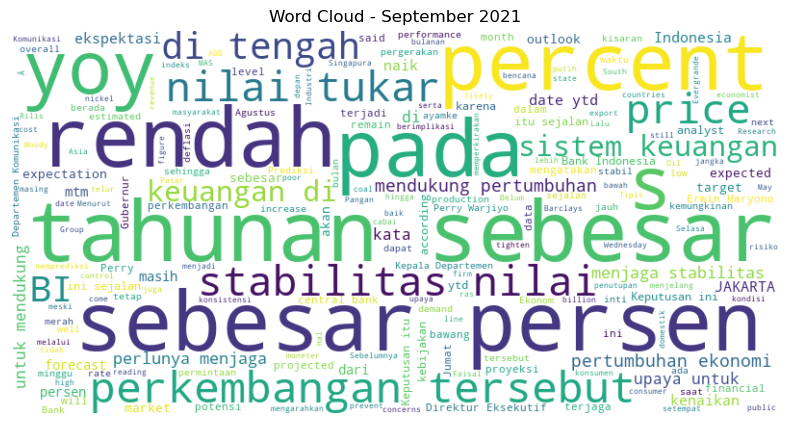

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Tambahkan stopwords khusus
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['inflasi', 'harga', 'yang', 'dengan', 'dan', 'year', 'kalender', 'perkiraan','inflation','secara','tahun','januari','september']) 


# Path file Excel
file_path = 'output/prediksi_sentimen_2021_2025_gabungan.xlsx'

# Baca file
df = pd.read_excel(file_path)

# Gabungkan seluruh teks dari kolom
text = ' '.join(df['Sentences'].dropna().astype(str))

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - September 2021')
plt.show()

In [ ]:
import os
import glob

# Folder dan triwulan
folder_path = 'output/2022'
months = ['2022_09', '2022_10', '2022_11', '2022_12']

# Ambil semua file yang sesuai
files = [os.path.join(folder_path, f"domestic_inflation_{month}.xlsx") for month in months]

# Gabungkan semua teks
all_text = ''
for file in files:
    df = pd.read_excel(file)
    all_text += ' '.join(df['main_sentence'].dropna().astype(str)) + ' '

# Buat dan tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Triwulan I 2021')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krisna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


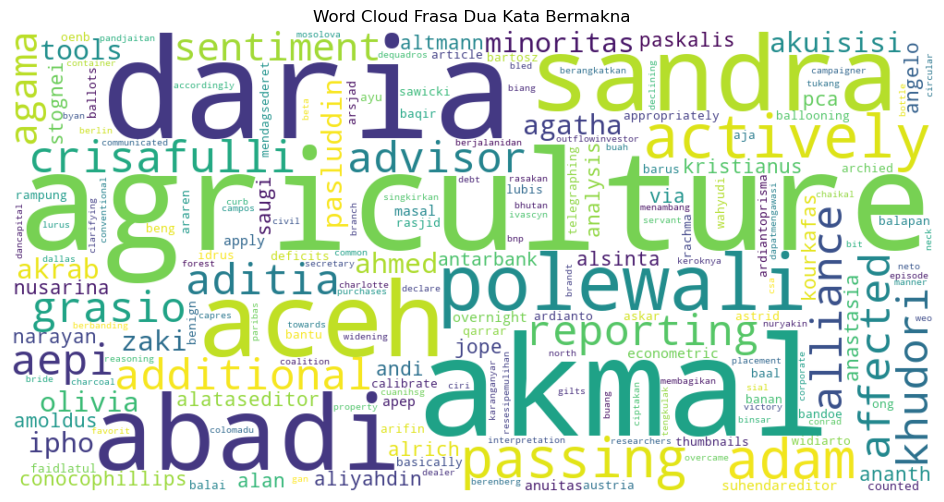

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.tokenize import TreebankWordTokenizer
import nltk

# Unduh data yang dibutuhkan
nltk.download('stopwords')

# === Setup Stopwords ===
custom_stopwords = set(stopwords.words('indonesian'))
custom_stopwords.update([
    'inflasi', 'harga', 'yang', 'dengan', 'dan', 'year', 'kalender',
    'perkiraan', 'inflation', 'secara', 'tahun', 'januari', 'september'
])


# === Load Data ===
file_path = 'output/prediksi_sentimen_2021_2025_gabungan.xlsx'
df = pd.read_excel(file_path)

# Gabungkan semua kalimat
text = ' '.join(df['Sentences'].dropna().astype(str)).lower()

# Tokenisasi dan pembersihan
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
#tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
tokens = [word for word in tokens if word.isalpha()]


# === Temukan bigram signifikan ===
finder = BigramCollocationFinder.from_words(tokens)
# Filter kata yang tidak penting
finder.apply_word_filter(lambda w: w in custom_stopwords or len(w) < 3)

# Pilih top-N bigram dengan PMI tertinggi
top_bigrams = finder.nbest(BigramAssocMeasures.pmi, 100)

# Gabungkan menjadi teks frasa bigram
bigram_phrases = [' '.join(bigram) for bigram in top_bigrams]
bigram_text = ' '.join(bigram_phrases)

# Buat WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(bigram_text)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Frasa Dua Kata Bermakna')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krisna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


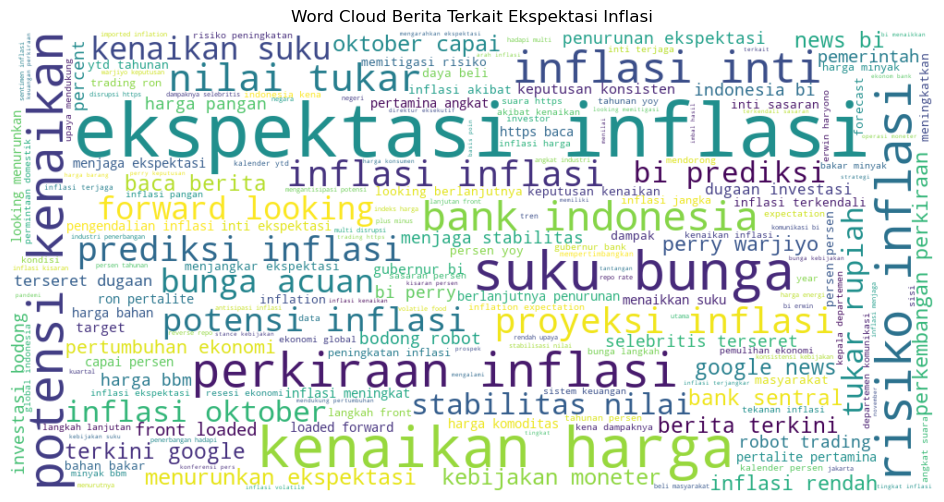

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
import nltk

# Unduh stopwords jika belum
nltk.download('stopwords')

# === Stopwords: Bahasa Indonesia + custom ===
custom_stopwords = set(stopwords.words('indonesian'))
#custom_stopwords.update([
#    'inflasi', 'harga', 'yang', 'dengan', 'dan', 'year', 'kalender',
#    'perkiraan', 'inflation', 'secara', 'tahun', 'januari', 'september'
#])

# === Load Data ===
file_path = 'output/prediksi_sentimen_2021_2025_gabungan.xlsx'
df = pd.read_excel(file_path)

# Gabungkan semua teks
text = ' '.join(df['Sentences'].dropna().astype(str)).lower()

# Tokenisasi dan filter kata
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
filtered_tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]

# Gabungkan kembali untuk wordcloud
clean_text = ' '.join(filtered_tokens)

# Buat WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(clean_text)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Berita Terkait Ekspektasi Inflasi')
plt.show()
